In [2]:
#Функция для удаления дубликатов
def unique(lst):
    seen = set()
    result = []
    for x in lst:
        if x in seen:
            continue
        seen.add(x)
        result.append(x)
    return result

In [3]:
#Функция перемножения множеств
def inters(a):
    s=set(a[0])
    for lst in a:
        s=s.intersection(set(lst))
    return(s)   

In [4]:
#вывести список групп
def spec():
    import sqlite3
    #Создание списка из всех направлений...
 
    conn = sqlite3.connect("stud_spisok_ege.db")
    cursor = conn.cursor()

    #выбираем прошедшие данные чтобы их вывести...
    sql = "SELECT grp_spec_grp_spec_name FROM stud_spisok "
    cursor.execute(sql)
    #print(cursor.fetchall())
    specials=cursor.fetchall()

    conn.commit()
    conn.close()

    #Делаем список из специальностей
    specs=[]
    for i in range(len(unique(specials))):
        specs.append(unique(specials)[i][0])
    return(specs)

In [5]:
#Ищем id студентов выбранной специальности
def kods(specs):
    import sqlite3
 
    conn = sqlite3.connect("stud_spisok_ege.db")
    cursor = conn.cursor()

    #выбираем прошедшие данные чтобы их вывести...
    sql = "SELECT stud_kod FROM stud_spisok WHERE grp_spec_grp_spec_name = ?"
    cursor.execute(sql,[(specs)])
    #print(cursor.fetchall())
    students_kod=cursor.fetchall()

    conn.commit()
    conn.close()

    kod=[]
    for i in range(len(students_kod)):
        kod.append(students_kod[i][0])
    return(kod)

In [7]:
kod=kods(spec()[0])

In [6]:
#Выводим оценки за выбранный предмет для каждого id:
#Ищем id студентов выбранной специальности
def markses(ID, predmet,semak):
    import sqlite3
 
    
    conn = sqlite3.connect("stud_spisok_ege.db")
    cursor = conn.cursor()
    
    #matan='Математический анализ'

    #выбираем прошедшие данные чтобы их вывести...
    sql = "SELECT ball FROM stud_spisok_ball WHERE stud_kod = ? AND predmet_name=? AND semestr=?"
    cursor.execute(sql,[(ID),(predmet),(semak)])
    #print(cursor.fetchall())
    marks=cursor.fetchall()
    
    
    sql_11 = "SELECT ball FROM stud_spisok_ball WHERE predmet_name=?"
    cursor.execute(sql_11,[(predmet)])
    maximum=cursor.fetchall()
    
    conn.commit()
    conn.close()
    
    new_11=0
    for i in maximum:
        if i[0]==None: continue
        if new_11<i[0]: new_11=i[0]

    new=[]
    for i in marks:
        if i[0]==None: new.append(0)
        else:new.append(i[0]*100/new_11)
    return(new)    

In [8]:
markses(kod[0],'Линейная алгебра',1)

[60.0, 70.0, 37.5]

In [9]:
#Вывод баллов ЕГЭ для выбранного студента:
def identyEge(IDENTY, Ege_predmet):
    import sqlite3
 
    conn = sqlite3.connect("stud_spisok_ege.db")
    cursor = conn.cursor()

    #выбираем прошедшие данные чтобы их вывести...
    sql = "SELECT ball FROM raiting_ege WHERE stud_kod = ? AND predmet_name=?"
    cursor.execute(sql,[(IDENTY),(Ege_predmet)])
    #print(cursor.fetchall())
    student_ege=cursor.fetchall()
    conn.commit()
    conn.close()
    if student_ege==[]:return(0)
    else: return(student_ege[0][0])

In [10]:
identyEge(kod[0], 'Математика')

56

In [11]:
#Билижайшие соседи по баллам ЕГЭ
#Ранжируем соседей по расстоянию
import numpy as np
def NearestNeighbours(person):
    nearest=[]
    for i in range(len(kod)):
        nearest+=[(abs(identyEge(kod[i], 'Математика')-identyEge(person, 'Математика')),kod[i])]
    nearest.sort(key=lambda i: i[0])    
    return(nearest)    

In [12]:
spis=NearestNeighbours(kod[0])

In [13]:
spis

[(0, 50095),
 (0, 50226),
 (0, 50576),
 (0, 50728),
 (0, 50768),
 (0, 50862),
 (0, 50890),
 (0, 51076),
 (0, 51171),
 (0, 51180),
 (0, 51224),
 (0, 51384),
 (0, 51390),
 (0, 51495),
 (0, 51642),
 (0, 51944),
 (0, 51999),
 (0, 52442),
 (0, 52617),
 (0, 52702),
 (0, 52706),
 (0, 54112),
 (0, 55163),
 (0, 55269),
 (0, 55580),
 (0, 56625),
 (0, 56645),
 (0, 57173),
 (0, 57641),
 (0, 57945),
 (0, 58475),
 (0, 58591),
 (0, 59287),
 (0, 59597),
 (0, 59745),
 (0, 60014),
 (0, 60153),
 (0, 60894),
 (0, 61571),
 (0, 62263),
 (0, 62799),
 (0, 63308),
 (0, 63546),
 (0, 63605),
 (0, 64362),
 (0, 64547),
 (0, 66142),
 (0, 300459),
 (0, 300650),
 (0, 301190),
 (0, 301434),
 (0, 301520),
 (0, 301545),
 (0, 302020),
 (0, 302689),
 (0, 302981),
 (0, 303229),
 (0, 303533),
 (0, 303579),
 (0, 303648),
 (0, 303893),
 (0, 304001),
 (0, 304429),
 (0, 304734),
 (0, 305917),
 (0, 306247),
 (0, 308178),
 (0, 308479),
 (0, 308502),
 (0, 309068),
 (0, 310196),
 (0, 310963),
 (0, 311017),
 (0, 311521),
 (0, 311668

In [14]:
#Находим Евклидово расстояние между оценками за 1 семестр для его проверки.
#Эвклидово расстояние
def EuclideanDistance(list1, list2):
    
    if list2==[]: 
        return(0)
    else:
        #Если списки не равны, то уравниваем их:
        if len(list1)!=len(list2):
            if len(list1)>len(list2):
                list2+=[0]*abs(len(list1)-len(list2))
            else: 
                list1+=[0]*abs(len(list1)-len(list2))
                           
        Eukl=0
        for i in range(len(list1)):
            Eukl+=(list1[i]-list2[i])**2
        return(Eukl**(1/2))

In [15]:
EuclideanDistance(markses(kod[0], 'Линейная алгебра',1), markses(spis[3][1], 'Линейная алгебра',1))

48.605555238058955

In [17]:
#Строим градиентый спуск для конкретного человека в зависимости от количества ближайших соседей.
obsh=0
grspp=[]
for K in range(200):
    #Суммарное расстояние(для вычисления среднеарифметического)
    obsh+=EuclideanDistance(markses(kod[0], 'Линейная алгебра',1), markses(spis[K+1][1], 'Линейная алгебра',1))
    grspp.append(obsh/(K+1))

In [19]:
#grspp

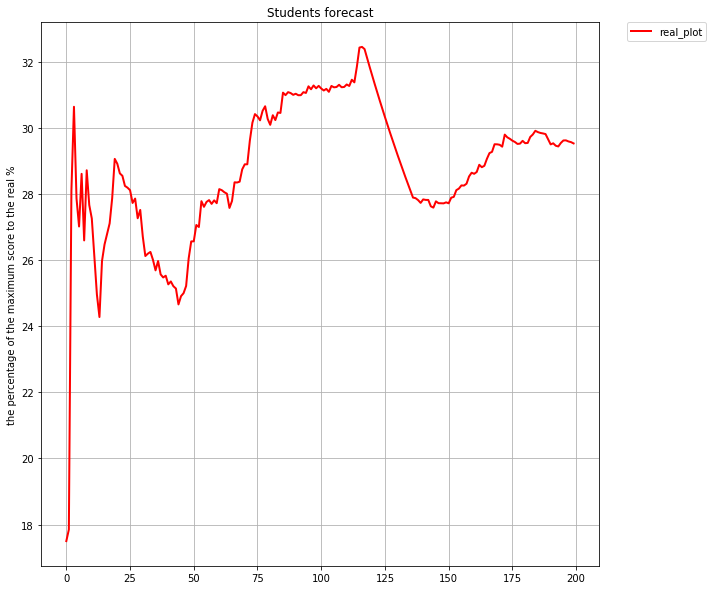

In [44]:
#Градиентный спсук
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = [10,10])
plt.title("Students forecast")
#plt.plot(finAver,'g', label='average_plot', linewidth=2)
plt.plot(grspp,'r', label='real_plot', linewidth=2)
plt.ylabel('the percentage of the maximum score to the real %')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.grid(True)
plt.show()

In [20]:
#Строим градиентый спуск для группы людей- 3D.
grspp=[]
for kk in range(len(kod[:100])):
    obsh=0
    for K in range(200):
        #Суммарное расстояние(для вычисления среднеарифметического)
        obsh+=EuclideanDistance(markses(kod[kk], 'Линейная алгебра',1), markses(spis[K+1][1], 'Линейная алгебра',1))
        grspp.append([kk,obsh/(K+1),K])

In [21]:
grsppv=np.array(grspp)

In [25]:
onX1=pd.Series(grsppv[:,0])
onY1=pd.Series(grsppv[:,1])
onZ1=pd.Series(grsppv[:,2])

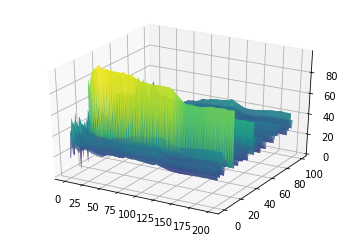

In [29]:
# library
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(onZ1, onX1, onY1, cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(onX1, onZ1, onY1, cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=6)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(onX1, onZ1, onY1, cmap=plt.cm.jet, linewidth=0.01)
plt.show()

In [61]:
onX=pd.Series(bks[:,0])
onY=pd.Series(bks[:,1])
onZ=pd.Series(bks[:,2])